In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Flatten, SimpleRNN
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
X_data = [np.sin(i) for i in  range(1000)]

In [4]:
X, Y = [], []
for i in range(994):
    X.append([[X_data[i + j]] for j in range(5)])
    Y.append(X_data[i+6])

In [5]:
for i in range(5):
  print(X[i], Y[i])

[[0.0], [0.8414709848078965], [0.9092974268256817], [0.1411200080598672], [-0.7568024953079282]] -0.27941549819892586
[[0.8414709848078965], [0.9092974268256817], [0.1411200080598672], [-0.7568024953079282], [-0.9589242746631385]] 0.6569865987187891
[[0.9092974268256817], [0.1411200080598672], [-0.7568024953079282], [-0.9589242746631385], [-0.27941549819892586]] 0.9893582466233818
[[0.1411200080598672], [-0.7568024953079282], [-0.9589242746631385], [-0.27941549819892586], [0.6569865987187891]] 0.4121184852417566
[[-0.7568024953079282], [-0.9589242746631385], [-0.27941549819892586], [0.6569865987187891], [0.9893582466233818]] -0.5440211108893698


In [6]:
X = np.array(X, dtype="float32")
Y = np.array(Y, dtype="float32")

In [7]:
X.shape

(994, 5, 1)

In [8]:
Y.shape

(994,)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)


In [11]:
model = Sequential()
model.add(SimpleRNN(2, input_shape=(5,1), return_sequences=True))
model.add(Flatten())
model.add(Dense(1, activation='tanh'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5, 2)              8         
                                                                 
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',loss='mae')

In [14]:
model.fit(X_train,y_train, epochs=1000, batch_size=64)

Epoch 1/1000
13/13 [==============================] - 1s 4ms/step - loss: 0.7937
Epoch 2/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.7343
Epoch 3/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6724
Epoch 4/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.6086
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.5446
Epoch 6/1000
13/13 [==============================] - 0s 4ms/step - loss: 0.4801
Epoch 7/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.4175
Epoch 8/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3579
Epoch 9/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.3018
Epoch 10/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2615
Epoch 11/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2379
Epoch 12/1000
13/13 [==============================] - 0s 3ms/step - loss: 0.2219
Epoch 13/1000
13/13 [====

In [15]:
y_predict=model.predict(X_test)

7/7 [==============================] - 0s 4ms/step


In [16]:
for i in range(5):
  print(y_predict[i], y_test[i])

[-0.25922918] -0.2537942
[-0.9641605] -0.9851618
[0.08163841] 0.07960864
[-0.9353329] -0.936462
[-0.9588688] -0.97464865


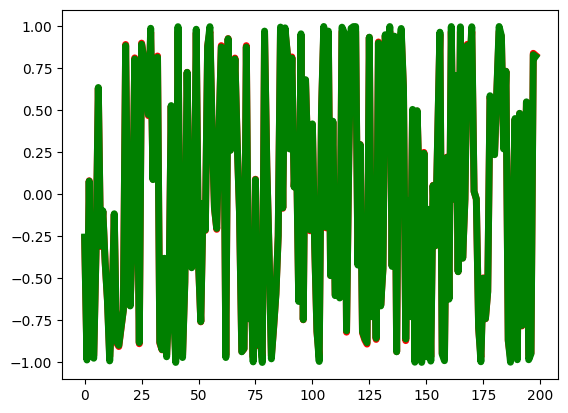

In [18]:
plt.plot(range(199),  y_predict, lw=5,c='r')
plt.plot(range(199),  y_test, lw=5, c='g')
plt.show()